# 200_Feature_Extraction

In this notebook I will contine the Time Series Classification process..
* Using an implementation of feature extraction (Approach 2) 
* Then apply multiple dimensional reducion techniques

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#200_Feature_Extraction" data-toc-modified-id="200_Feature_Extraction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>200_Feature_Extraction</a></span></li><li><span><a href="#Notebook-Set-Up" data-toc-modified-id="Notebook-Set-Up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Set Up</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Set-Parameters-For-Graphs" data-toc-modified-id="Set-Parameters-For-Graphs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Set Parameters For Graphs</a></span></li></ul></li><li><span><a href="#Load-The-Data" data-toc-modified-id="Load-The-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load The Data</a></span></li><li><span><a href="#Begin-Time-Series-Classification" data-toc-modified-id="Begin-Time-Series-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Begin Time Series Classification</a></span><ul class="toc-item"><li><span><a href="#Approach-2:-Feature-Extraction" data-toc-modified-id="Approach-2:-Feature-Extraction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Approach 2: Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Clean-the-extracted-Features" data-toc-modified-id="Clean-the-extracted-Features-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Clean the extracted Features</a></span></li><li><span><a href="#Normalize-Features" data-toc-modified-id="Normalize-Features-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Normalize Features</a></span></li></ul></li><li><span><a href="#Apply-Dimension-Reduction-Techniques" data-toc-modified-id="Apply-Dimension-Reduction-Techniques-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Apply Dimension Reduction Techniques</a></span><ul class="toc-item"><li><span><a href="#Multidimensional-scaling-(MDS)" data-toc-modified-id="Multidimensional-scaling-(MDS)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Multidimensional scaling (MDS)</a></span></li><li><span><a href="#Principal-Coordinates-Analysis--(PCA)" data-toc-modified-id="Principal-Coordinates-Analysis--(PCA)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Principal Coordinates Analysis  (PCA)</a></span></li><li><span><a href="#T-distributed-Stochastic-Neighbor-Embedding-(tSNE)" data-toc-modified-id="T-distributed-Stochastic-Neighbor-Embedding-(tSNE)-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>T-distributed Stochastic Neighbor Embedding (tSNE)</a></span></li></ul></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#Plot-'Clustered'-Graph" data-toc-modified-id="Plot-'Clustered'-Graph-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Plot 'Clustered' Graph</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Examine-Feature-Importances" data-toc-modified-id="Examine-Feature-Importances-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Examine Feature Importances</a></span></li></ul></li><li><span><a href="#Prepare-The-Data-For-Exportation" data-toc-modified-id="Prepare-The-Data-For-Exportation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Prepare The Data For Exportation</a></span><ul class="toc-item"><li><span><a href="#Merge-Dataframes-For-Analysis-Section" data-toc-modified-id="Merge-Dataframes-For-Analysis-Section-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Merge Dataframes For Analysis Section</a></span></li><li><span><a href="#Export-The-Data" data-toc-modified-id="Export-The-Data-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Export The Data</a></span></li></ul></li></ul></li></ul></div>

# Notebook Set Up

## Import Packages

In [1]:
import pickle
import numpy as np
import pandas as pd
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold,decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh import extract_features, select_features
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

## Set Parameters For Graphs

In [2]:
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 12

# Load The Data

In [3]:
with open('../data/core/core_df.pkl', 'rb') as f:
    core_df = pickle.load(f)

# Begin Time Series Classification

## Approach 2: Feature Extraction

Extract features from both Distance and Speed.
Prepare the Dataframe for the 'tsfresh' package.

In [4]:
df = core_df[['hashedathleteid','date','totaldistance','session_speed']]

Extract the features

In [5]:
extracted_features = extract_features(df, column_id="hashedathleteid",column_sort="date")

Feature Extraction: 100%|██████████| 179/179 [00:28<00:00,  6.26it/s]


In [6]:
extracted_features.shape

(3311, 1588)

### Clean the extracted Features

Remove colums which contain any nan values

In [54]:
extracted_features = extracted_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

Remove columns which contain the same number for each row.

In [8]:
extracted_features = extracted_features.drop(extracted_features.std()[(extracted_features.std() == 0)].index, axis=1)


In [9]:
extracted_features.shape

(3311, 368)

In [10]:
features = list(extracted_features)

### Normalize Features

The features will have to be normalised before being passed to the dimension reduction techniques

In [11]:
norm_features = extracted_features.loc[:, features].values
norm_features = preprocessing.MinMaxScaler().fit_transform(norm_features)

## Apply Dimension Reduction Techniques

### Multidimensional scaling (MDS)

In [12]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="euclidean", n_jobs=1, random_state=10)

In [ ]:
pos = mds.fit(norm_features).embedding_

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(pos[:, 0], pos[:, 1], lw=0.5,s=50,edgecolors='k')
plt.title('Multi-Dimensional Scaling',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### Principal Coordinates Analysis  (PCA)

In [15]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(norm_features)

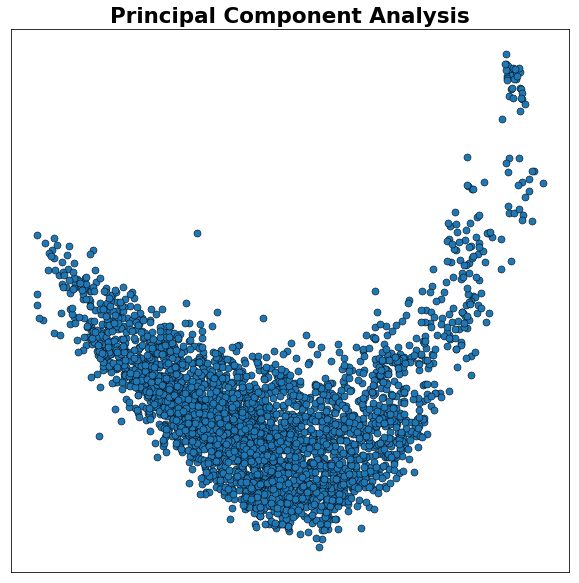

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(pca_res[:, 0], pca_res[:, 1],lw=0.5,s=50,edgecolors='k')
plt.title('Principal Component Analysis',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### T-distributed Stochastic Neighbor Embedding (tSNE)

In [17]:
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=30, learning_rate=500)
tsne_res = tsne.fit_transform(norm_features)

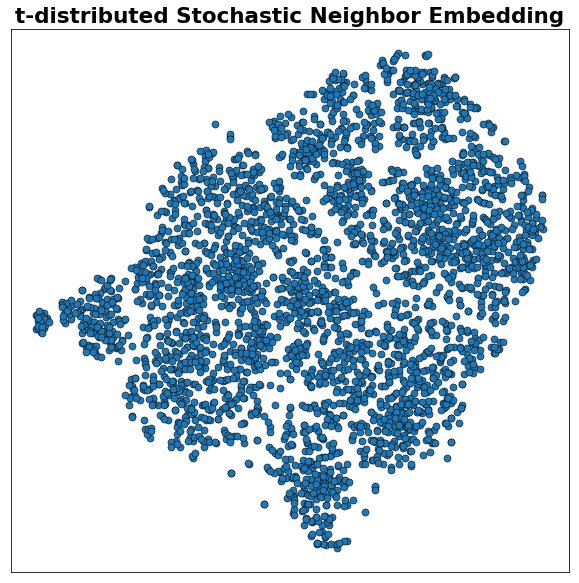

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1],lw=0.5,s=50,edgecolors='k')
plt.title('t-distributed Stochastic Neighbor Embedding',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

This is a graph which I can proceed to the next stage with. The next stage is clustering

## Hierarchical Clustering

In [19]:
a = linkage(tsne_res, 'average')

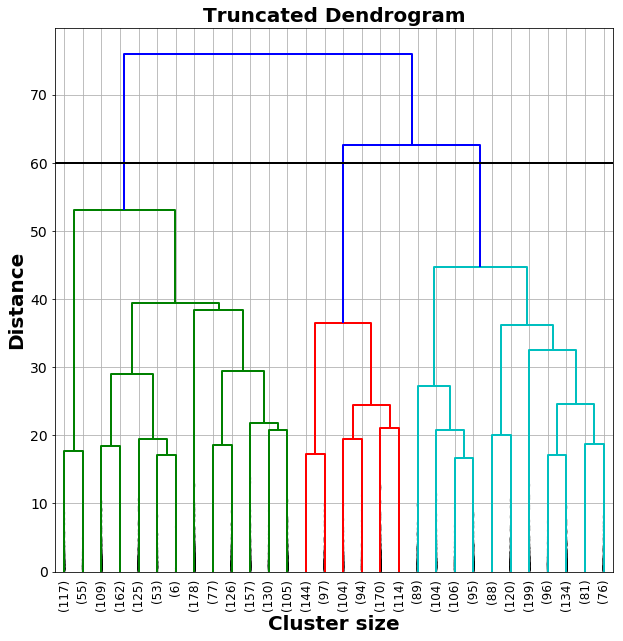

In [20]:
plt.figure(figsize=(10,10))
plt.title('Truncated Dendrogram',size=20)
plt.xlabel('Cluster size',size=20)
plt.ylabel('Distance',size=20)
dendrogram(
    a,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.axhline(60, color='black')
plt.show()

Apply cut

In [21]:
max_d = 60
clusters = fcluster(a, max_d, criterion='distance')
clusters

array([1, 2, 3, ..., 3, 3, 1], dtype=int32)

### Plot 'Clustered' Graph

In [22]:
tsne_df = pd.DataFrame({'co-ord1':tsne_res[:, 0],'co-ord2':tsne_res[:, 1],'cluster':clusters})

In [23]:
tsne_grouped = tsne_df.groupby('cluster')

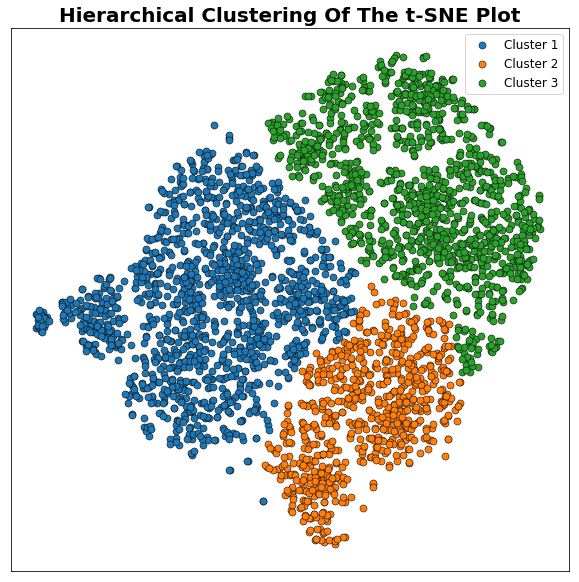

In [24]:
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Of The t-SNE Plot', size=20)
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
for group_number, group in tsne_grouped:
    plt.scatter(data=group, x='co-ord1', y='co-ord2',label=labels[group_number-1],lw=0.5,s=50,edgecolors='k')
plt.xticks([], [])
plt.yticks([], [])
plt.legend()

## Feature Selection

I decided to apply feature selection to see, which of the extracted features are the most important

In [ ]:
selected_extracted_features = select_features(extracted_features, clusters)

In [26]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(norm_features, clusters)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [27]:
InfoGain_df = pd.DataFrame({'Feature':indices,'Importance':importances[indices]})#.set_index('Feature')

### Examine Feature Importances

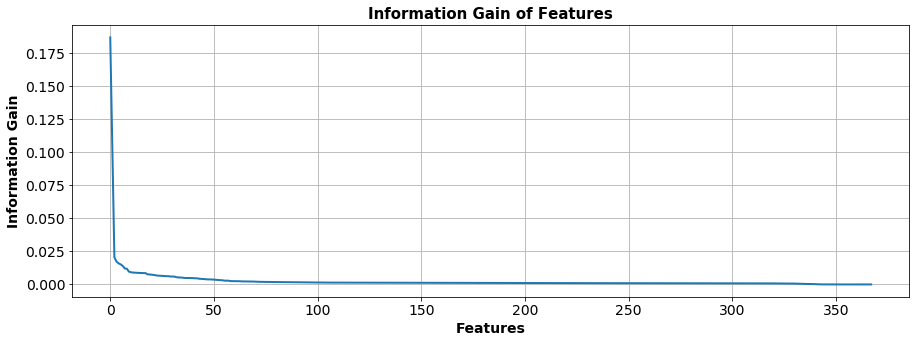

In [28]:
plt.figure(figsize=(15,5))
plt.plot(InfoGain_df.index,InfoGain_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain of Features',size=15)
plt.show()

In [29]:
selected_indices = indices[:10]

In [30]:
Selected_InfoGain_df = pd.DataFrame({'Feature':selected_indices,'Importance':importances[selected_indices]})#.set_index('Feature')

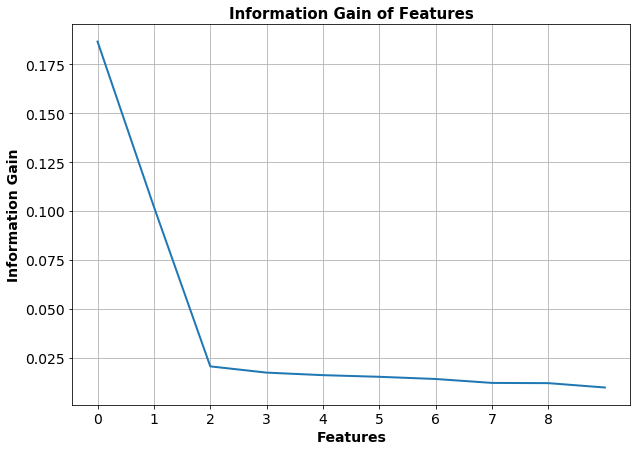

In [31]:
plt.figure(figsize=(10,7))
plt.plot(Selected_InfoGain_df.index,Selected_InfoGain_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain of Features',size=15)
plt.xticks(np.arange(0, 9, step=1))
plt.show()

In [32]:
Selected_InfoGain_df

,Feature,Importance
0,118,0.186727
1,304,0.102147
2,164,0.020503
3,119,0.017303
4,6,0.016004
5,350,0.015167
6,12,0.014042
7,358,0.012038
8,173,0.011920
9,100,0.009689


In [33]:
feature_names = list(extracted_features.iloc[:, Selected_InfoGain_df['Feature'].values])

In [34]:
feature_numbers = Selected_InfoGain_df['Feature'].values

In [35]:
dictionary = dict(zip(feature_numbers, feature_names))

In [36]:
Selected_InfoGain_df['Feature'] = Selected_InfoGain_df['Feature'].map(dictionary)

In [37]:
Selected_InfoGain_df = Selected_InfoGain_df.set_index('Feature')

In [38]:
Selected_InfoGain_df

,Importance
Feature,
session_speed__large_standard_deviation__r_0.2,0.186727
totaldistance__large_standard_deviation__r_0.25,0.102147
session_speed__ratio_beyond_r_sigma__r_3,0.020503
session_speed__large_standard_deviation__r_0.25,0.017303
session_speed__approximate_entropy__m_2__r_0.3,0.016004
totaldistance__ratio_beyond_r_sigma__r_3,0.015167
session_speed__binned_entropy__max_bins_10,0.014042
totaldistance__symmetry_looking__r_0.1,0.012038
session_speed__symmetry_looking__r_0.05,0.011920


In [39]:
Selected_InfoGain_df = Selected_InfoGain_df.head(2)

In [40]:
selected_total = Selected_InfoGain_df['Importance'].sum()

In [41]:
selected_total

0.2888741446279711

We can see that the top two feature account for almost thirty percent of the feature importance, I will examine these features more in the analysis section

In [42]:
extracted_features = extracted_features[Selected_InfoGain_df.index]

In [43]:
list(extracted_features)

['session_speed__large_standard_deviation__r_0.2',
 'totaldistance__large_standard_deviation__r_0.25']

## Prepare The Data For Exportation

### Merge Dataframes For Analysis Section

In [44]:
core_df.head()

,hashedid,hashedathleteid,date,day,elevgain,session_speed,totaldistance,session_time,marathon_finish_time,marathon_speed,average_weekly_trainings,average_weekly_training_hours,average_weekly_totaldistance,speed_std,totaldistance_std,average_speed,trained_below_marathon_speed,max_speed,marathon_distance_covered,average_elevgain
0,a6ae93146bc4dd6b73d38e5794b929ecbbe2ec4fd9a42c...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-02-07,Saturday,27.7500,12.062547,14.7322,75.701460,3.866633,10.912594,5.466667,5.996248,64.20622,0.747782,7.337974,10.812254,1,33.7961,0,58.943371
1,23f77558ccaace2f29e035d7990d14e4e5359b9595eb7a...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-03-29,Sunday,46.8029,10.170626,21.1151,124.565193,3.866633,10.912594,5.466667,5.996248,64.20622,0.747782,7.337974,10.812254,1,33.7961,0,58.943371
2,a9a217aa6a84ac4a6f57df61f5d26434fd7112cc94fd09...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-02-10,Tuesday,32.8400,10.866057,8.3354,46.026262,3.866633,10.912594,5.466667,5.996248,64.20622,0.747782,7.337974,10.812254,1,33.7961,0,58.943371
3,4a37d1ee822ea68d904442e240a58aedad9b38bed77790...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-04-09,Thursday,42.2500,10.588531,8.2448,47.195372,3.866633,10.912594,5.466667,5.996248,64.20622,0.747782,7.337974,10.812254,1,33.7961,0,58.943371
4,9d4d274d23c7ceaa58468c4724f738c1835a8a77523e31...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-01-26,Monday,27.3433,10.411186,5.0239,28.952898,3.866633,10.912594,5.466667,5.996248,64.20622,0.747782,7.337974,10.812254,1,33.7961,0,58.943371


In [45]:
extracted_features['hashedathleteid'] = extracted_features.index

In [46]:
extracted_features.head()

variable,session_speed__large_standard_deviation__r_0.2,totaldistance__large_standard_deviation__r_0.25,hashedathleteid
id,,,
001250bf9af5c8ca8da0c45b71a45bd436c7711f58464bb37bd26be6281a7190,1.0,1.0,001250bf9af5c8ca8da0c45b71a45bd436c7711f58464b...
001abdb40b0a013e365bc8a133662e966f82ce3c182d751c05f2d3f62d73050f,1.0,0.0,001abdb40b0a013e365bc8a133662e966f82ce3c182d75...
003c925d765bce7554fbe1e4a5aaa915151223ee11baca9d4dfbed40e79901b2,0.0,0.0,003c925d765bce7554fbe1e4a5aaa915151223ee11baca...
0041494146257ddf07cefc67cee41bd241666f396cdba9f2f6dc34f2bfa1f32e,1.0,1.0,0041494146257ddf07cefc67cee41bd241666f396cdba9...
0042ba4a5e96367280ac1fe4c5c2a41e815c5c6f05a5ec8b994348a244703e86,1.0,0.0,0042ba4a5e96367280ac1fe4c5c2a41e815c5c6f05a5ec...


In [47]:
tsne_df['hashedathleteid'] = extracted_features.index

In [48]:
tsne_df.head()

,co-ord1,co-ord2,cluster,hashedathleteid
0,-23.150282,23.173647,1,001250bf9af5c8ca8da0c45b71a45bd436c7711f58464b...
1,38.785469,-33.313683,2,001abdb40b0a013e365bc8a133662e966f82ce3c182d75...
2,44.126740,43.641781,3,003c925d765bce7554fbe1e4a5aaa915151223ee11baca...
3,-44.357365,-11.771870,1,0041494146257ddf07cefc67cee41bd241666f396cdba9...
4,26.185331,-15.585198,2,0042ba4a5e96367280ac1fe4c5c2a41e815c5c6f05a5ec...


In [49]:
merged_df = pd.merge(core_df, extracted_features, on=['hashedathleteid'])

In [50]:
merged_df = pd.merge(merged_df, tsne_df, on=['hashedathleteid'])

In [51]:
merged_df.head()

,hashedid,hashedathleteid,date,day,elevgain,session_speed,totaldistance,session_time,marathon_finish_time,marathon_speed,...,average_speed,trained_below_marathon_speed,max_speed,marathon_distance_covered,average_elevgain,session_speed__large_standard_deviation__r_0.2,totaldistance__large_standard_deviation__r_0.25,co-ord1,co-ord2,cluster
0,a6ae93146bc4dd6b73d38e5794b929ecbbe2ec4fd9a42c...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-02-07,Saturday,27.7500,12.062547,14.7322,75.701460,3.866633,10.912594,...,10.812254,1,33.7961,0,58.943371,1.0,0.0,62.767345,-12.85172,3
1,23f77558ccaace2f29e035d7990d14e4e5359b9595eb7a...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-03-29,Sunday,46.8029,10.170626,21.1151,124.565193,3.866633,10.912594,...,10.812254,1,33.7961,0,58.943371,1.0,0.0,62.767345,-12.85172,3
2,a9a217aa6a84ac4a6f57df61f5d26434fd7112cc94fd09...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-02-10,Tuesday,32.8400,10.866057,8.3354,46.026262,3.866633,10.912594,...,10.812254,1,33.7961,0,58.943371,1.0,0.0,62.767345,-12.85172,3
3,4a37d1ee822ea68d904442e240a58aedad9b38bed77790...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-04-09,Thursday,42.2500,10.588531,8.2448,47.195372,3.866633,10.912594,...,10.812254,1,33.7961,0,58.943371,1.0,0.0,62.767345,-12.85172,3
4,9d4d274d23c7ceaa58468c4724f738c1835a8a77523e31...,588fec45fcc4c30e2882cafda4582bbef4ef808971b5ce...,2015-01-26,Monday,27.3433,10.411186,5.0239,28.952898,3.866633,10.912594,...,10.812254,1,33.7961,0,58.943371,1.0,0.0,62.767345,-12.85172,3


### Export The Data

In [52]:
with open('../data/core/core_analysis_df.pkl', 'wb') as f:
    pickle.dump(merged_df, f)